In [2]:
# Import dependencies
import pandas as pd
import pycaret
from pycaret.classification import *

In [7]:
# Read and display dataframe
health_df = pd.read_csv('../Resources/diabetes_binary_health_indicators_BRFSS2015.csv')
health_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [38]:
# Check size of original dataset
health_df.shape

(253680, 22)

In [39]:
# Create smaller sub-dataframe
small_df = health_df.head(100000)

In [40]:
# Create 2 bins for mental health. One at 0, one from 1-30
for index, row in small_df.iterrows():
    if small_df.loc[index,'MentHlth'] == 0:
        small_df.loc[index, 'MentHlth'] = 0
    elif small_df.loc[index,'MentHlth'] < 31:
        small_df.loc[index, 'MentHlth'] = 1
    else:
        small_df.loc[index, 'MentHlth'] = np.NaN

In [41]:
# Separate data into training and testing sets
data = small_df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = small_df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (90000, 22)
Unseen Data For Predictions: (10000, 22)


In [42]:
# Initialization setup
exp_clf101 = setup(data = data, target = 'MentHlth', session_id=123)

,Description,Value
0,Session id,123
1,Target,MentHlth
2,Target type,Binary
3,Original data shape,"(90000, 22)"
4,Transformed data shape,"(90000, 22)"
5,Transformed train set shape,"(62999, 22)"
6,Transformed test set shape,"(27001, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [43]:
# Model training and selection
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7348,0.7389,0.3545,0.6340,0.4547,0.2975,0.3195,0.3760
gbc,Gradient Boosting Classifier,0.7348,0.7410,0.3445,0.6391,0.4476,0.2932,0.3174,1.5060
lightgbm,Light Gradient Boosting Machine,0.7346,0.7400,0.3633,0.6294,0.4606,0.3010,0.3210,0.2190
lr,Logistic Regression,0.7285,0.7262,0.3084,0.6332,0.4147,0.2644,0.2934,0.3970
lda,Linear Discriminant Analysis,0.7277,0.7264,0.3142,0.6269,0.4185,0.2655,0.2926,0.0850
ridge,Ridge Classifier,0.7275,0.0000,0.2898,0.6395,0.3988,0.2535,0.2868,0.0530
rf,Random Forest Classifier,0.7108,0.7011,0.3688,0.5549,0.4431,0.2584,0.2682,1.1630
et,Extra Trees Classifier,0.6970,0.6781,0.3712,0.5202,0.4332,0.2343,0.2405,1.7400
svm,SVM - Linear Kernel,0.6960,0.0000,0.2848,0.6223,0.3199,0.1825,0.2278,0.4310
knn,K Neighbors Classifier,0.6939,0.6489,0.3457,0.5138,0.4133,0.2168,0.2246,11.8640


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [44]:
# Return best performing model
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


In [45]:
# Trains and evaluates random forest classifier
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7178,0.7087,0.3896,0.5699,0.4628,0.2805,0.2898
1,0.7060,0.6967,0.3583,0.5436,0.4319,0.2447,0.2544
2,0.7137,0.6997,0.3771,0.5609,0.4510,0.2672,0.2769
3,0.7124,0.7077,0.3684,0.5591,0.4442,0.2611,0.2714
4,0.7071,0.6895,0.3588,0.5465,0.4332,0.2470,0.2570
5,0.7186,0.7015,0.3720,0.5756,0.4519,0.2742,0.2860
6,0.7019,0.7019,0.3557,0.5332,0.4267,0.2360,0.2448
7,0.7141,0.7055,0.3710,0.5634,0.4474,0.2654,0.2760
8,0.7040,0.6979,0.3588,0.5382,0.4305,0.2412,0.2502


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
# Automatically tune the hyperparameters
tuned_rf = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7286,0.7216,0.2996,0.6388,0.4079,0.2606,0.2920
1,0.7254,0.7205,0.2672,0.6442,0.3777,0.2384,0.2765
2,0.7202,0.7185,0.3003,0.6033,0.4010,0.2443,0.2696
3,0.7246,0.7198,0.2957,0.6234,0.4011,0.2507,0.2802
4,0.7178,0.7186,0.2570,0.6136,0.3623,0.2183,0.2524
5,0.7263,0.7242,0.2967,0.6303,0.4035,0.2546,0.2851
6,0.7117,0.7179,0.2901,0.5752,0.3857,0.2232,0.2455
7,0.7305,0.7168,0.2728,0.6658,0.3870,0.2513,0.2924
8,0.7257,0.7163,0.3186,0.6167,0.4201,0.2637,0.2884


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


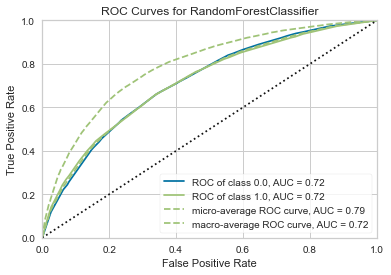

In [47]:
# Plot ROC curves
plot_model(tuned_rf, plot = 'auc')

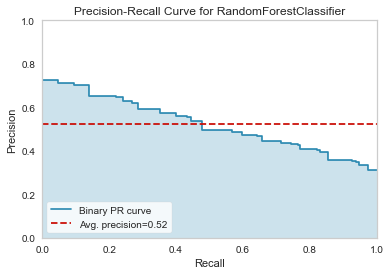

In [48]:
# Plot precision-recall curves
plot_model(tuned_rf, plot = 'pr')

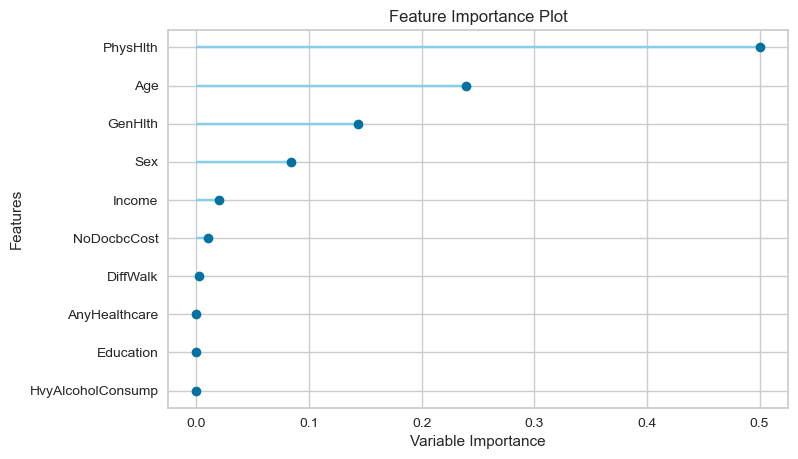

In [49]:
# Feature importance plot
plot_model(tuned_rf, plot='feature')

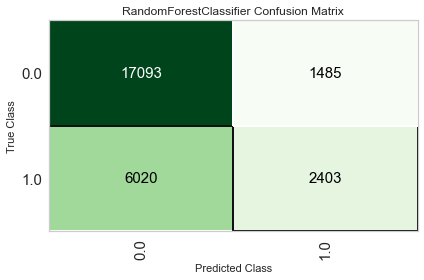

In [50]:
# Visualize confusion matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

In [51]:
# Predict on unseen data
unseen_predictions = predict_model(tuned_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7282,0.7104,0.2720,0.6395,0.3817,0.2422,0.2786


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentHlth,Label,Score
0,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,1.0,...,3.0,5.0,0.0,0.0,6.0,6.0,8.0,0.0,1,0.5916
1,1.0,1.0,1.0,1.0,35.0,0.0,1.0,1.0,0.0,1.0,...,4.0,10.0,1.0,0.0,13.0,5.0,2.0,0.0,0,0.5429
2,1.0,1.0,1.0,1.0,30.0,0.0,1.0,1.0,1.0,1.0,...,4.0,6.0,1.0,0.0,11.0,3.0,1.0,0.0,0,0.5429
3,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,7.0,4.0,7.0,1.0,0,0.6366
4,1.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,...,4.0,7.0,1.0,0.0,7.0,4.0,2.0,1.0,1,0.7775
